In [ ]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib.dates 
import datetime 
%matplotlib inline
train = pd.read_csv('../data/train.csv')
store = pd.read_csv('../data/store.csv')
test = pd.read_csv('../data/test.csv') 

store.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_17036\1250322050.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [2]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


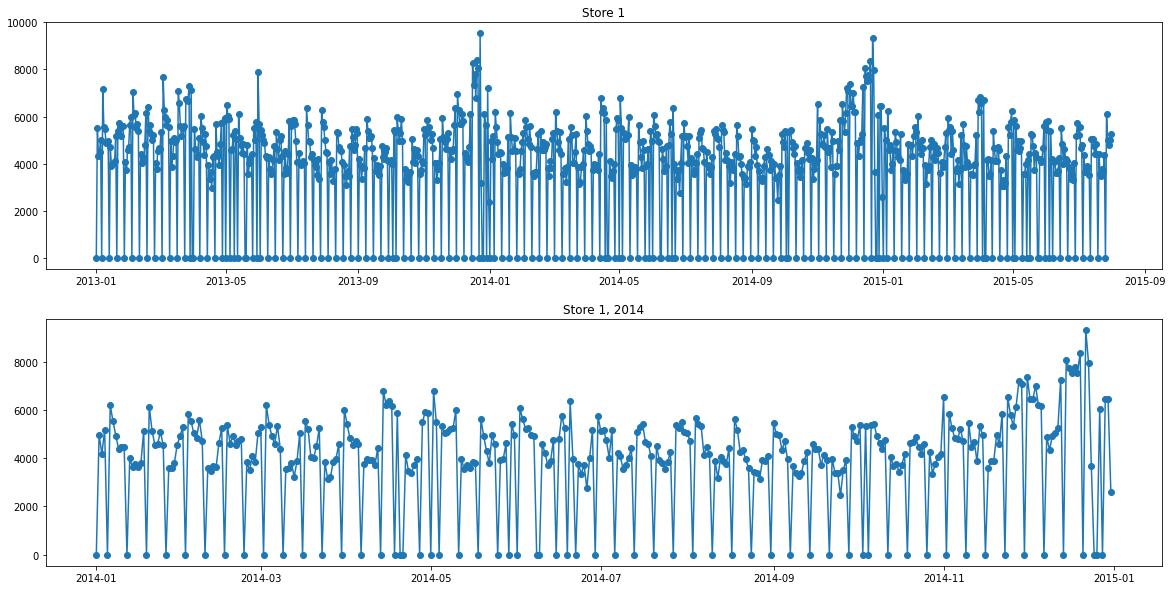

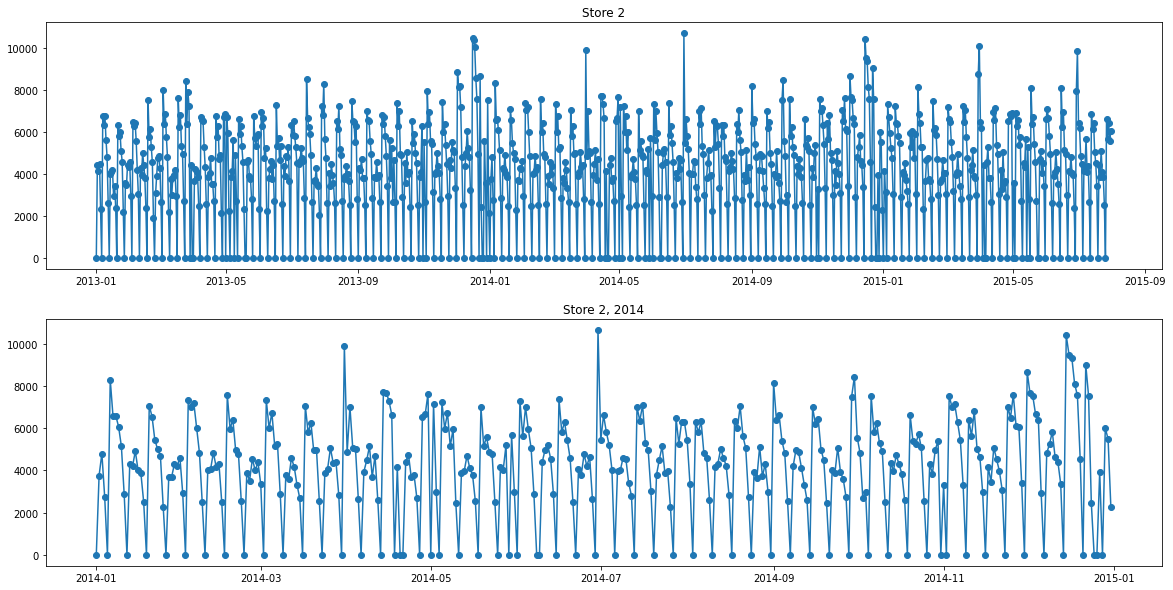

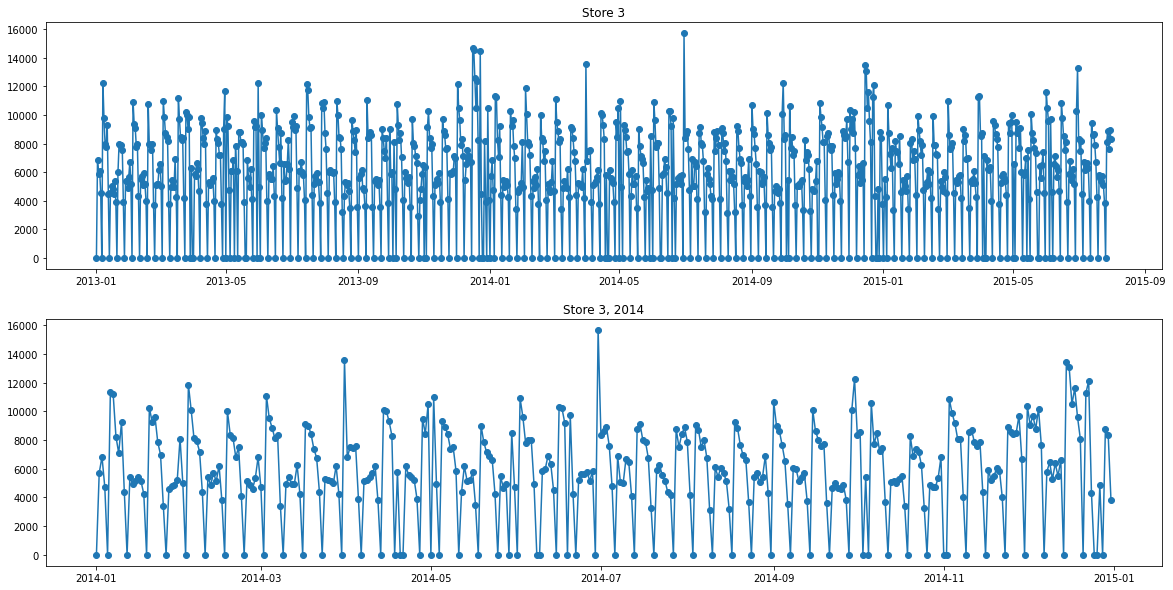

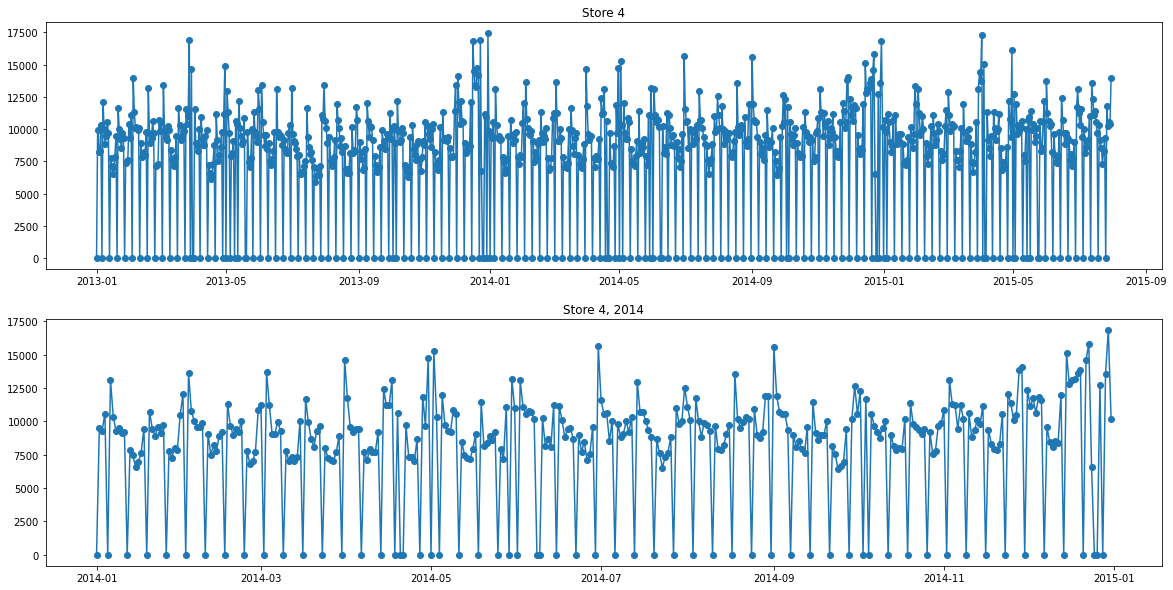

In [4]:
## transform date variable
datetimes = [datetime.datetime.strptime(t, "%Y-%m-%d") for t in train.Date]
plotData = matplotlib.dates.date2num(datetimes) 
train = train.join(pd.DataFrame(plotData,columns = ['datetimes']))
def splitTime(x): 
    mysplit = datetime.datetime.strptime(x,  "%Y-%m-%d") 
    return [mysplit.year,mysplit.month,mysplit.day]
train = train.join(pd.DataFrame(train.Date.apply(splitTime).tolist(), columns = ['year','mon','day']))

# plot the first 5 stores sales vs time

for i in range(1,5):
 plt.figure(i,figsize=(20,10)) 
 plt.subplot(211)
 plt.plot_date(train.loc[train.Store==i,'datetimes'],train.loc[train.Store==i,'Sales'],linestyle='-') 
 plt.title('Store %d' %i)  
 plt.subplot(212)
 train2014 = train.loc[train.year == 2014,:]
 plt.plot_date(train2014.loc[train2014.Store==i,'datetimes'],train2014.loc[train2014.Store==i,'Sales'],linestyle='-') 
 plt.title('Store %d, 2014' %i)  
 plt.show()

In [ ]:

## distribution of sales variable
plt.figure(1,figsize=(15,10)) 
plt.subplot(221)
plt.hist(train.Sales,bins=30)
plt.title("Distribution of Sales") 
plt.subplot(222)
plt.hist(np.log(train.Sales+1),bins=30)
plt.title("Distribution of log(Sales)") 